<h3>Modelo de clasificación de imagenes Pizza vs. Helado</h3>
<p>Aldo Tena García - A01275222</p>

# Selección del dataset

El dataset seleccionado para este modelo es "Pizza vs Ice Cream", fue descargado de la plataforma kaggle ([Pizza vs Ice Cream](https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream)) el 14 de mayo del 2024.La razón prinicipal para la selección de este dataset fue el objetivo de comparar 2 elementos diferentes usando el modelo a desarrollar, en este caso 2 alimentos diferentes, ademas de la estructura ya definida del set (con las carpetas train y test con sus respectivos tags) y la cantidad inicial de imagenes contenidas en el dataset (aproximadamente 500 imagenes de train y 50 de test).

Después de ver nuevamente la cantidad de imagenes necesarias para entrenar y verificar el correcto funcionamiento del modelo se modifico la cantidad de imagenes presentes dentro de los datasets para dejar 200 imagenes dentro de test y de train respectivamente. Para poder entrenar de la mejor posible el moodelo se hara uso de tecnicas de data augmentation para poder suministrar los recursos necesarios para el entrenamiento del modelo.

In [2]:
#Importar las librerias necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

import os
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Establecer los directorios de las imágenes
#Directorio base
base_dir = 'D:\DocumentosDD\Profesional\8vo Semestre\Aplicaciones avanzadas\Modulo 2 - IA\ImageClassification'
#Directorios de train y test
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
#Directorios de train para pizza y helado
train_pizza = os.path.join(train_dir,'pizza')
train_icecream = os.path.join(train_dir, 'icecream')
#Directorios de test para pizza y helado
test_pizza = os.path.join(test_dir,'pizza')
test_icecream = os.path.join(test_dir, 'icecream')

In [4]:
#Tamaño al que quieres redimensionar las imágenes (en píxeles)
size = (255,255) 
#Función para iterar sobre todos los archivos en la carpeta
def resize(folder):
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            full_path = os.path.join(folder, file)
            image = Image.open(full_path)
            resized_image = image.resize(size, Image.ANTIALIAS)
            resized_image.save(os.path.join(folder,file))
#Redimensionar test-pizza
resize(test_pizza)
#Redimensionar test-icecream
resize(test_icecream)
#Redimensionar train-pizza
resize(train_pizza)
#Redimensionar train-icecream
resize(train_icecream)

C:\Users\atg00\AppData\Local\Temp\ipykernel_20784\1674089321.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


### Data augmentation

In [5]:
#Configurar los parametros necesarios para el data augmentation
train_datagen = ImageDataGenerator(
					rescale = 1./255,
					rotation_range = 60,
					width_shift_range = 0.2,
					height_shift_range = 0.2,
					#shear_range = 0.3,
					zoom_range = 0.3,
					horizontal_flip = True
					)

In [10]:
#Configurar el train_datagen 
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size = (255,255),
					batch_size = 8, #batch_size sera cambiado a 400 para el entrenamiento del modelo
					class_mode ='binary',
					)

Found 400 images belonging to 2 classes.


### Imprimir imágenes generadas

<Figure size 640x480 with 0 Axes>

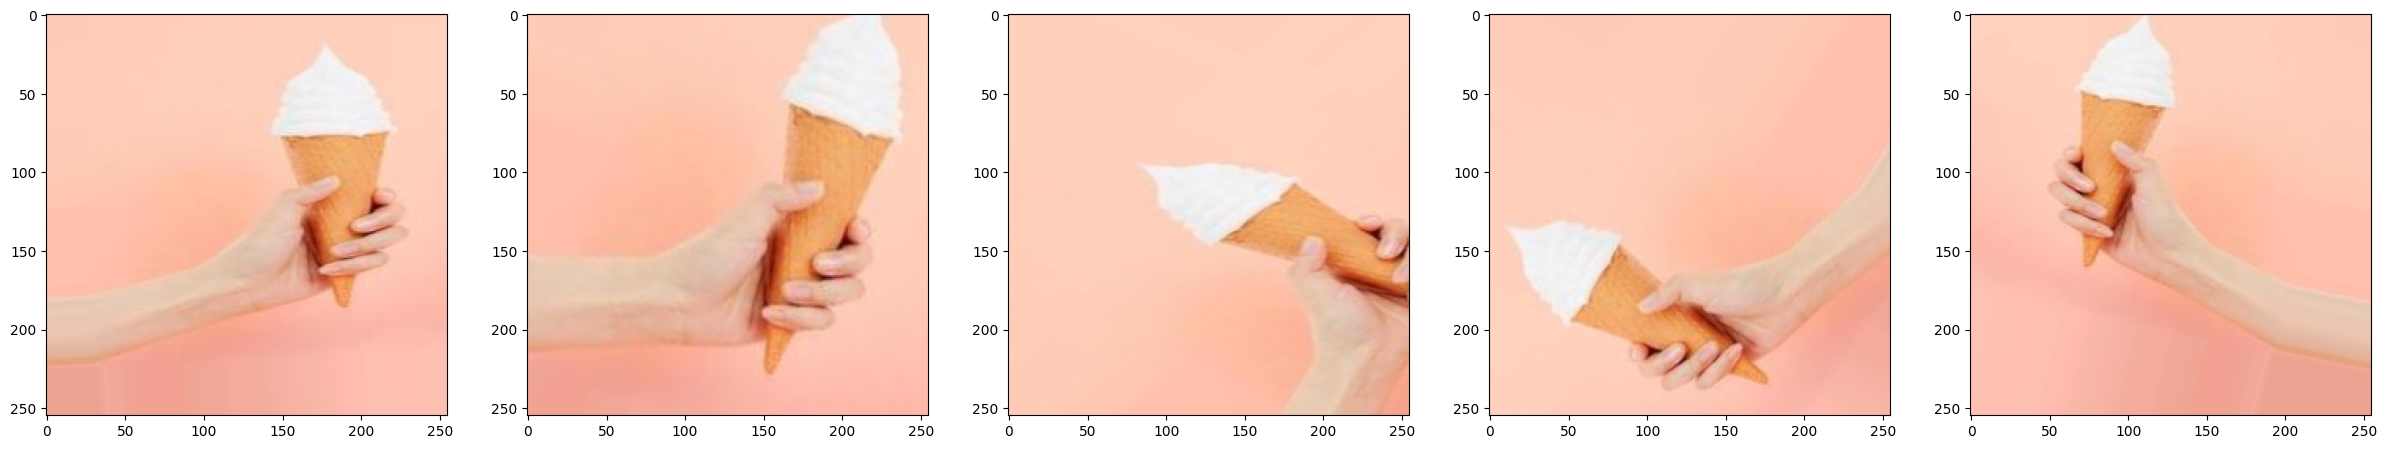

In [11]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30,8)) 
for i in range(5) :
    axarr[i].imshow(train_generator[0][0][0])

(5, 255, 255, 3)
[0. 0. 0. 1. 1.]


<Figure size 640x480 with 0 Axes>

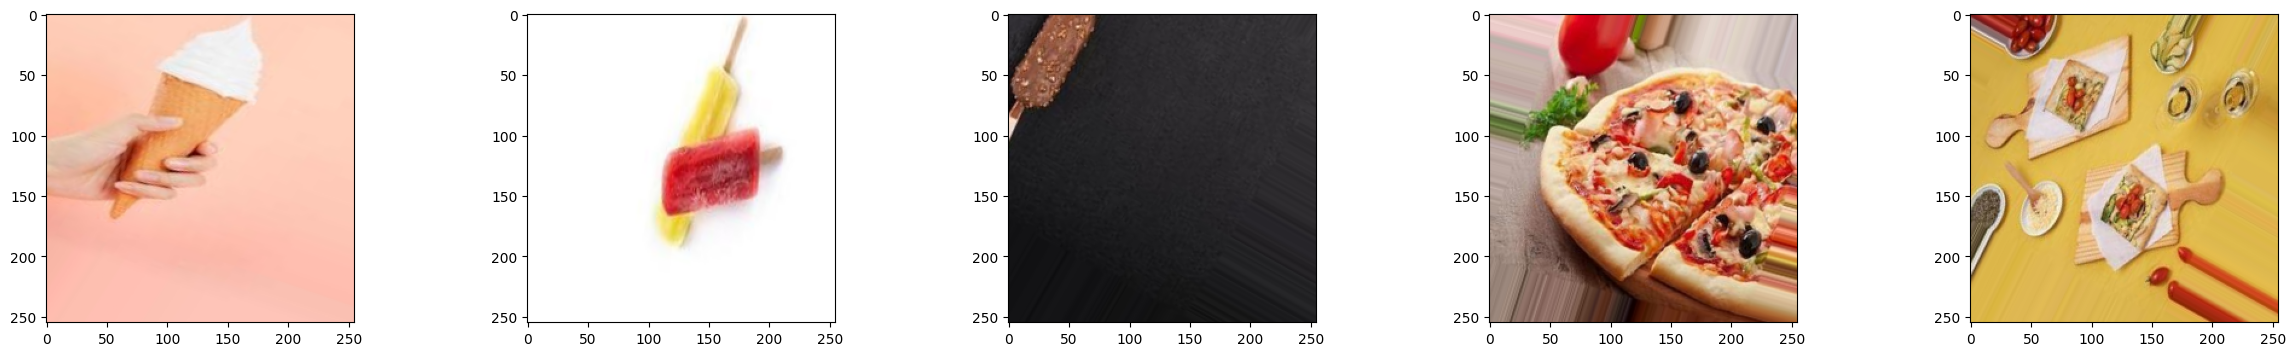

In [13]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
    axarr[i].imshow(images[i])